In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Function from last week homework, useful for this HW too

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [21]:
from helpers import load_data

# load dataset
x, y = load_data()

In [22]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [66]:
from costs import *
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    ytest = y[k_indices[k]]
    
    not_k = np.array([i for i in range(len(x)) if i not in k_indices[k]])
    ytrain = y[not_k]
    xtest = x[k_indices[k]]
    xtrain = x[not_k]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    txtrain = build_poly(xtrain, degree)
    txtest = build_poly(xtest, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w = ridge_regression(ytrain, txtrain, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = compute_rmse(ytrain, txtrain, w)
    loss_te = compute_rmse(ytest, txtest, w)
    

    return loss_tr, loss_te

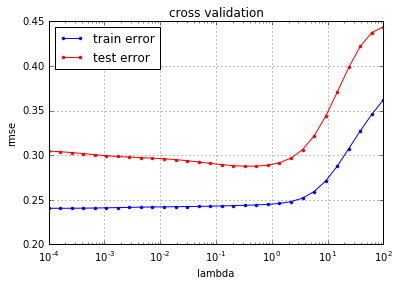

In [67]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for lambda_ in lambdas:
        trainerrors = []
        testerrors = []
        for k in range(k_fold):
            trainerror, testerror = cross_validation(y, x, k_indices, k, lambda_, degree)
            trainerrors.append(trainerror)
            testerrors.append(testerror)
        
        mse_tr.append(np.mean(trainerrors))
        mse_te.append(np.mean(testerrors))
    
    
    cross_validation_visualization(lambdas, mse_tr, mse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

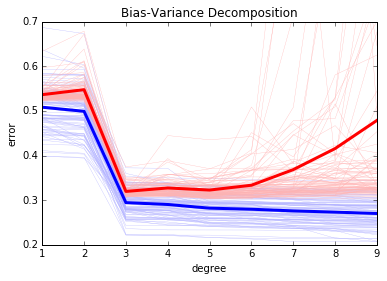

In [80]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        xtr, ytr, xte, yte = split_data(x, y, ratio_train, index_seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index_degree, degree in enumerate(degrees):
            lambda_ = 1
            txtrain = build_poly(xtr, degree)
            txtest = build_poly(xte, degree)
            loss, w = least_squares(ytr, txtrain)
            
            loss_tr = compute_rmse(ytr, txtrain, w)
            loss_te = compute_rmse(yte, txtest, w)
            
            rmse_tr[index_seed, index_degree] = loss_tr
            rmse_te[index_seed, index_degree] = loss_te
            

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()